In [2]:
import seaborn
from content.detr.util.plot_utils import plot_logs
from pathlib import Path
import pandas as pd
from pathlib import Path, PurePath
import matplotlib.pyplot as plt

In [3]:
!cd /media/App/tsai/capstone/content/detr/

## Show metrics for bbox training

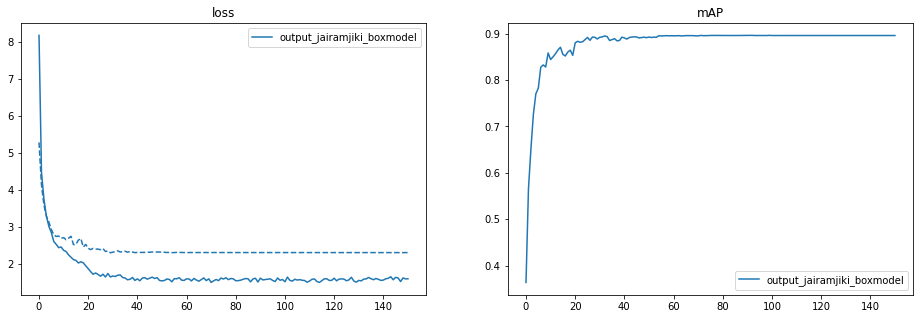

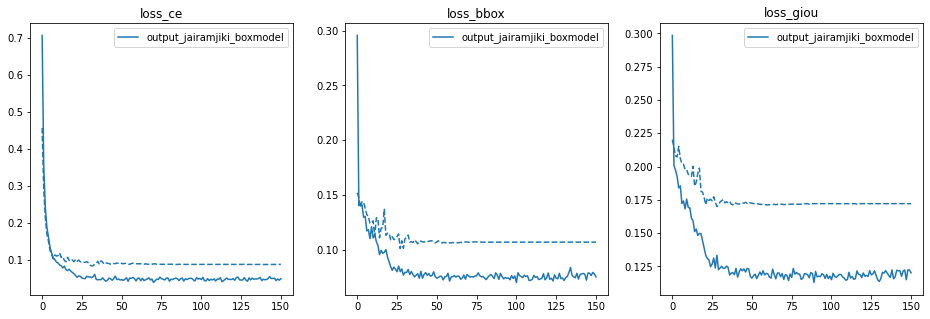

In [4]:
log_directory = [Path('/media/App/tsai/capstone/output_jairamjiki_boxmodel/')]
fields_of_interest = ('loss', 'mAP', )
plot_logs(log_directory, fields_of_interest)

fields_of_interest = ('loss_ce', 'loss_bbox', 'loss_giou')
plot_logs(log_directory, fields_of_interest)

## Show training metrics for panoptic model

In [6]:
# Plot training curves
log_directory = [Path('/media/App/tsai/capstone/output_jairamjiki_panoptic/')]
logs = log_directory
if not isinstance(logs, list):
    if isinstance(logs, PurePath):
        logs = [logs]
        print(f"{func_name} info: logs param expects a list argument, converted to list[Path].")
    else:
        raise ValueError(f"{func_name} - invalid argument for logs parameter.\n \
        Expect list[Path] or single Path obj, received {type(logs)}")

log_name = 'log.txt'
# Quality checks - verify valid dir(s), that every item in list is Path object, and that log_name exists in each dir
for i, dir in enumerate(logs):
    if not isinstance(dir, PurePath):
        raise ValueError(f"{func_name} - non-Path object in logs argument of {type(dir)}: \n{dir}")
    if not dir.exists():
        raise ValueError(f"{func_name} - invalid directory in logs argument:\n{dir}")
    # verify log_name exists
    fn = Path(dir / log_name)
    if not fn.exists():
        print(f"-> missing {log_name}.  Have you gotten to Epoch 1 in training?")
        print(f"--> full path of missing log file: {fn}")

# load log file(s) and plot
dfs = [pd.read_json(Path(p) / log_name, lines=True) for p in logs]

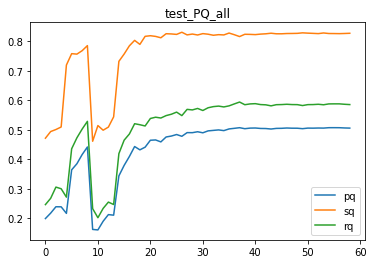

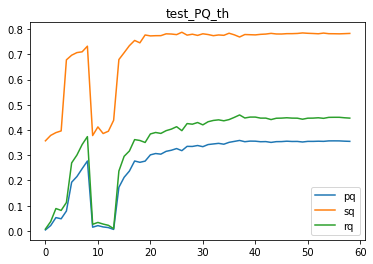

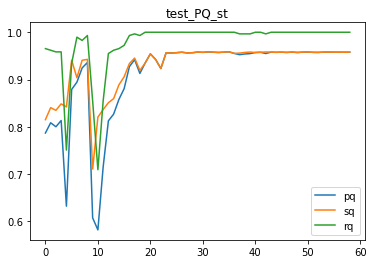

In [8]:
## Note, training was restarted after 15 epochs thats why we have the dip in metrics. It was again restarted
for l in ['test_PQ_all', 'test_PQ_th', 'test_PQ_st']:

    pq, sq, rq = [], [], []
    for x in dfs[0][l]:
        pq.append(x['pq'])
        sq.append(x['sq'])
        rq.append(x['rq'])  
    plt.plot(pq, label='pq')
    plt.plot(sq, label='sq')
    plt.plot(rq, label='rq')
    plt.legend()
    plt.title(l)
    plt.show()